# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:** ###

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:** ###

In [3]:
# Здесь код с численным примером

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

***Предположение:
Да, можем попробовать избавиться от шума в данных с помощью PCA. Проецируем объекты на главные компоненты, а затем делаем обратное преобразование***

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

/Users/nadezdasoroko/.pyenv/versions/3.12.11/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/nadezdasoroko/.pyenv/versions/3.12.11/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/nadezdasoroko/.pyenv/versions/3.12.11/lib/python3.12/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

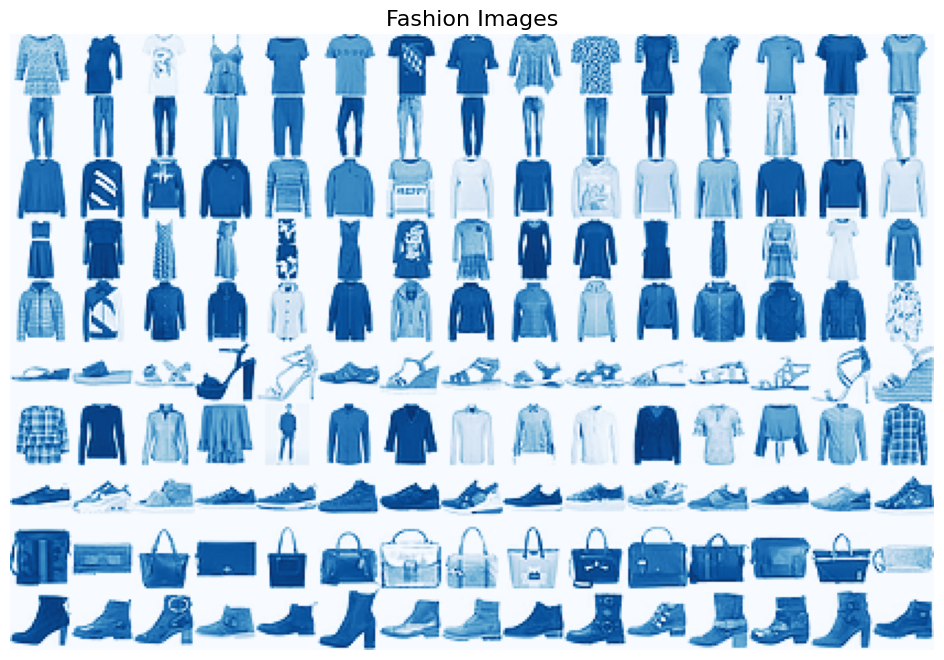

In [5]:
classes = sorted(np.unique(train_labels).astype(int)) # уникальные метки класса по порядку
h = w = 28  # кол-во пикселей вдоль изображения
n_samples = 15

# Изобразим по 15 представителей всех классов (одна строка - один класс)
fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()  # Находим индексы всех изображений текущего класса
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h # вертикальная позиция класса
    for col, sample_idx in enumerate(sample_indices):
        j = col * w # горизонтальная позиция класса
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [6]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [ ]:
from sklearn.model_selection import train_test_split

#<ENTER YOUR CODE HERE>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
# stratify = y - стратификацию по колонке отклика, для сохранения соотношения классов в train и test

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

#<ENTER YOUR CODE HERE>
start = time.time()
logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred, average = 'weighted')
end = time.time()
print('f1_score', f1)
print('Затраченное время', end - start)



f1_score 0.7446483892266774
Затраченное время 13.145097255706787


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**:  
$$ \text{F1score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$

$ \text{Precision} = \frac{TP}{TP+FP} $ \- точность, доля правильно найденных positive среди всех найденных (для контроля ложных ответов)  

$ \text{Recall} = \frac{TP}{TP+FN} $ \- полнота, доля правильно определенных positive среди всех возможных positive (для контроля правильности найденных)  

$ \text{F1score} \in [0, 1] $  

Плюсы:  
- Объединяет 2 важные метрики
- Устойчива к несбалансированным классам  

Минусы:  
- Никак не учитывает TN
- Не дифференцируема
- Сложная интерпритация

`average = 'weighted'` - усредняет метрику для каждого класса с весами, пропорциональными кол-ву объектов в каждом классе  
`macro` - обычное среднее F_1 по классам  
`micro` - TP, FP, FN среднее по всем классам, затем уже в F_1  
`None` - отдельные метрики для каждого класса 

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

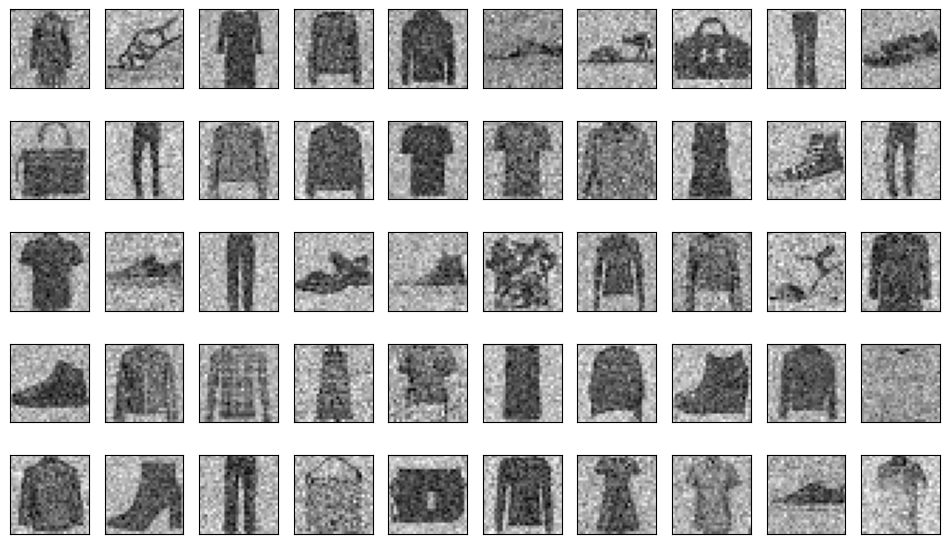

In [9]:
#<ENTER YOUR CODE HERE>

import numpy as np
np.random.seed(42)
X_train_noisy = np.random.normal(X_train, 50)
X_test_noisy = np.random.normal(X_test, 50)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)


In [10]:
#<ENTER YOUR CODE HERE>
logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(X_train_noisy, y_train)
y_pred = logreg.predict(X_test_noisy)
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f1)

0.7268607902763737


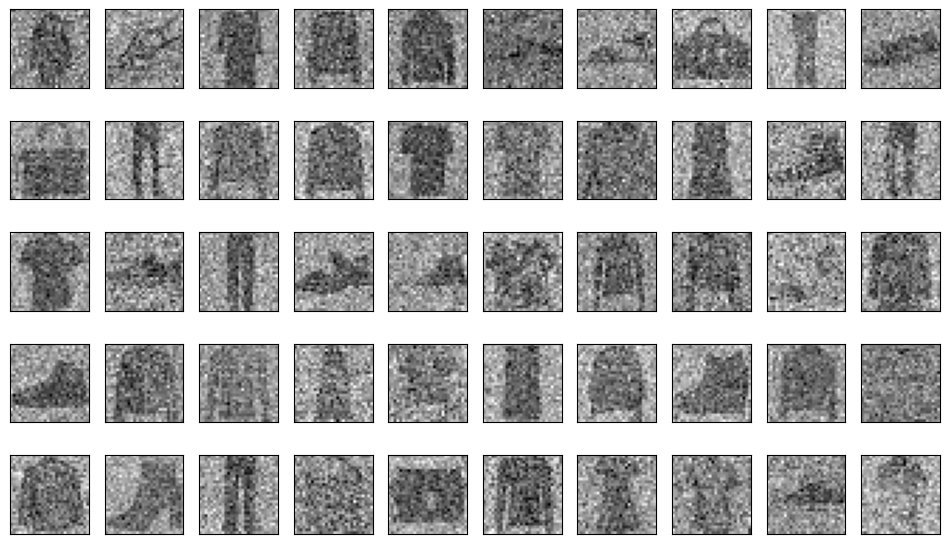

In [ ]:
#<ENTER YOUR CODE HERE>
np.random.seed(42)
X_train_noisy = np.random.normal(X_train, 100)
X_test_noisy = np.random.normal(X_test, 100)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)


In [12]:
#<ENTER YOUR CODE HERE>
logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(X_train_noisy, y_train)
y_pred = logreg.predict(X_test_noisy)
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f1)

0.6595278208556729


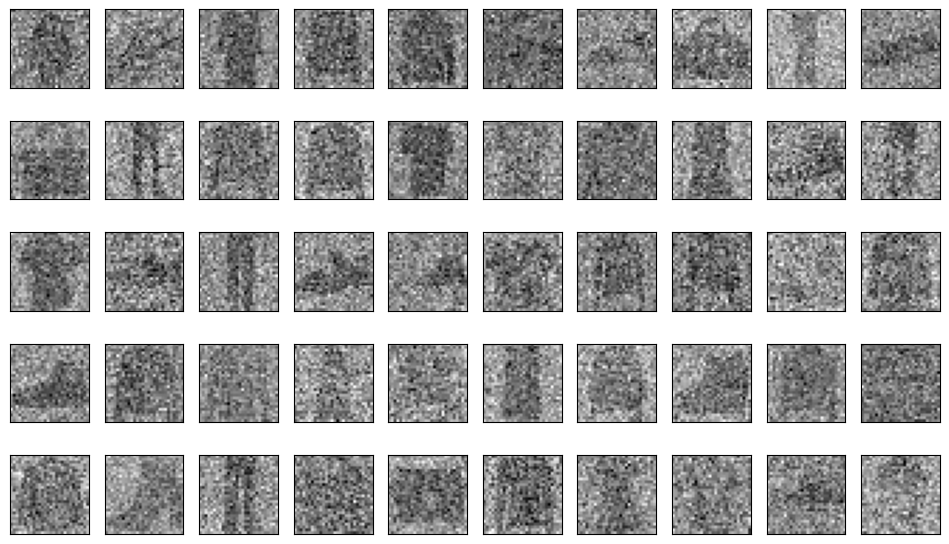

In [ ]:
#<ENTER YOUR CODE HERE>
np.random.seed(42)
X_train_noisy = np.random.normal(X_train, 150)
X_test_noisy = np.random.normal(X_test, 150)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)


In [16]:
#<ENTER YOUR CODE HERE>
logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(X_train_noisy, y_train)
y_pred = logreg.predict(X_test_noisy)
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f1)

0.6111872726297078


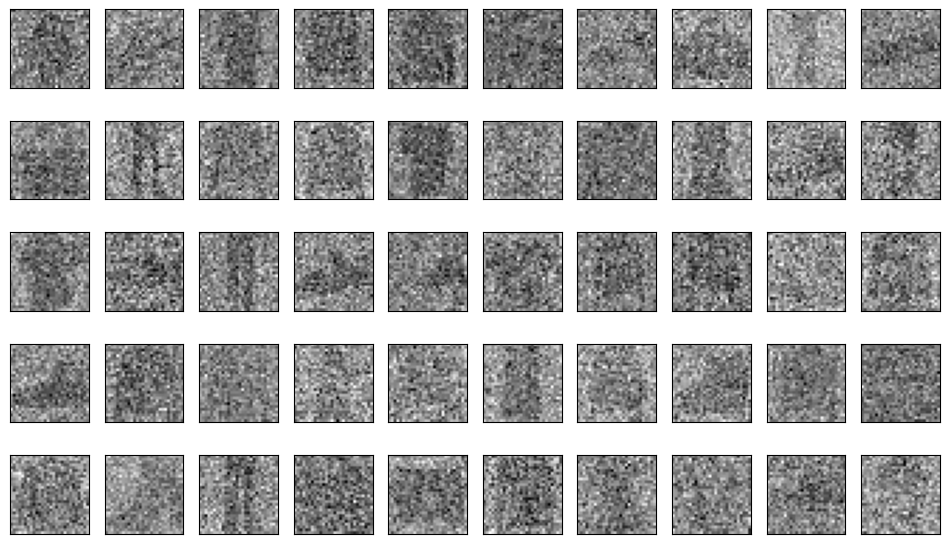

In [ ]:
#<ENTER YOUR CODE HERE>
np.random.seed(42)
X_train_noisy = np.random.normal(X_train, 200)
X_test_noisy = np.random.normal(X_test, 200)

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)


In [14]:
#<ENTER YOUR CODE HERE>
logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(X_train_noisy, y_train)
y_pred = logreg.predict(X_test_noisy)
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f1)

0.5516388645916603


/Users/nadezdasoroko/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Ваши выводы:**  

***Чем больше стандартное отклонение (scale), тем сильнее шум. Его наличие ухудшает результаты модели, метрика F1 имеет слишком маленькие значения.***

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

In [38]:
from sklearn.decomposition import PCA

#<ENTER YOUR CODE HERE>
pca = PCA(0.1, random_state=0).fit(X_train_noisy)    # Сохраняем всего 10% информации (Отбрасываем компоненты с малой дисперсией, уменьшаем шум, сохраняя основную информацию)
print('n_components:', pca.n_components_)


n_components: 3


In [ ]:
tr = pca.transform(X_train_noisy)
restored_X_train_noisy = pca.inverse_transform(tr)

ts = pca.transform(X_test_noisy)
restored_X_test_noisy = pca.inverse_transform(ts)


fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

In [ ]:
#<ENTER YOUR CODE HERE>
for explained_variance in np.arange(0.1, 1.0, 0.1):
    pca = PCA(explained_variance, random_state=0).fit(X_train_noisy) 
    print('n_components:', pca.n_components_)

    tr = pca.transform(X_train_noisy)
    restored_X_train_noisy = pca.inverse_transform(tr)

    ts = pca.transform(X_test_noisy)
    restored_X_test_noisy = pca.inverse_transform(ts)


    fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:** 
Низкая объясненная дисперсия (0.1-0.2) - слишком много информации теряется, качество низкое

Средняя объясненная дисперсия (0.3-0.6) - оптимальный баланс между удалением шума и сохранением полезной информации

Высокая объясненная дисперсия (0.7-0.9) - сохраняется слишком много шума, качество приближается к зашумленным данным

PCA действительно помогает бороться с шумом, но требует тщательного подбора параметра объясненной дисперсии для достижения оптимального результата.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
#<ENTER YOUR CODE HERE>
logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(restored_X_train_noisy, y_train)
y_pred = logreg.predict(restored_X_test_noisy)
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f1)

0.6147144877878729


/Users/nadezdasoroko/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

In [37]:
f1s = np.zeros(shape = (10,4))
scales = np.arange(50, 20, 50)
explained_variances = np.arange(0.1, 1.0, 0.1)
for explained_variance in explained_variances:
    for scale in scales:
        np.random.seed(42)
        X_train_noisy = np.random.normal(X_train, scale)
        X_test_noisy = np.random.normal(X_test, scale)

        pca = PCA(explained_variance, random_state=0).fit(X_train_noisy) 
        print('n_components:', pca.n_components_)
        
        tr = pca.transform(X_train_noisy)
        restored_X_train_noisy = pca.inverse_transform(tr)

        ts = pca.transform(X_test_noisy)
        restored_X_test_noisy = pca.inverse_transform(ts)

        logreg = LogisticRegression(max_iter = 2000, tol = 0.001, random_state = 42).fit(restored_X_train_noisy, y_train)
        y_pred = logreg.predict(restored_X_test_noisy)
        f1s[i][j] = f1_score(y_test, y_pred, average = 'weighted')


**Ваши выводы:** ###

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:** ###

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [20]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [21]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.